In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\SVM\mushroom.csv")

In [4]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
data = data.drop('Unnamed: 0', axis = 1)

In [7]:
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [8]:
data.shape

(2000, 25)

In [9]:
data.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


Average **stalk height** of mushrooms is 8.44 cm with a deviation of 3.69.

Average **diameter** of mushrooms is 12.31 cm.

In [10]:
data.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

**There are no missing values in the data.**

**Unique values:**

In [11]:
print(data.nunique())

cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64


In [12]:
data['class'].value_counts()

poisonous    1400
edible        600
Name: class, dtype: int64

In [13]:
data['habitat'].value_counts()

urban      316
woods      295
meadows    294
leaves     293
waste      280
paths      275
grasses    247
Name: habitat, dtype: int64

In [14]:
data['gill_color'].value_counts()

orange       216
black        192
green        183
purple       173
pink         168
buff         165
chocolate    161
gray         160
brown        152
yellow       151
white        148
red          131
Name: gill_color, dtype: int64

In [15]:
data['population'].value_counts()

abundant     360
clustered    340
several      335
solitary     332
numerous     323
scattered    310
Name: population, dtype: int64

In [16]:
data['veil_type'].value_counts()

universal    1010
partial       990
Name: veil_type, dtype: int64

In [17]:
data['veil_color'].value_counts()

white     553
brown     548
yellow    453
orange    446
Name: veil_color, dtype: int64

In [18]:
data['ring_type'].value_counts()

sheathing     305
cobwebby      248
large         247
flaring       246
none          243
pendant       239
zone          237
evanescent    235
Name: ring_type, dtype: int64

In [19]:
data['stalk_shape'].value_counts()

enlarging    1040
tapering      960
Name: stalk_shape, dtype: int64

**Visualizations:**

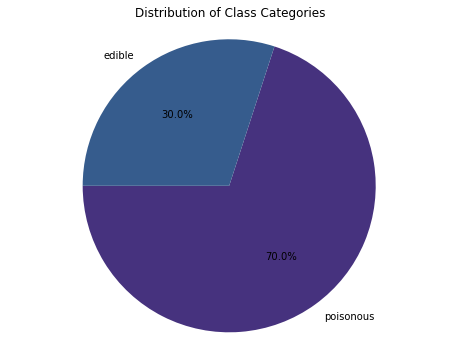

In [20]:
class_counts = data['class'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=180,
       colors=sns.color_palette('viridis'))
plt.title('Distribution of Class Categories')
plt.axis('equal') 
plt.show()

Around **70%** of the mushrooms in the data are **poisonous** and **30%** of the mushrooms are **edible.**

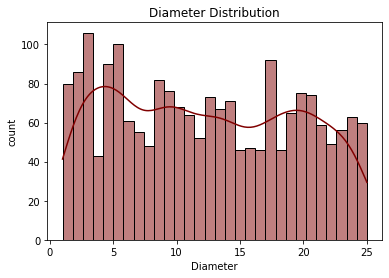

In [21]:
sns.histplot(data['cap_diameter'].dropna(), kde=True, color='maroon', bins=30)

plt.xlabel('Diameter')
plt.ylabel('count')
plt.title('Diameter Distribution')
plt.show()

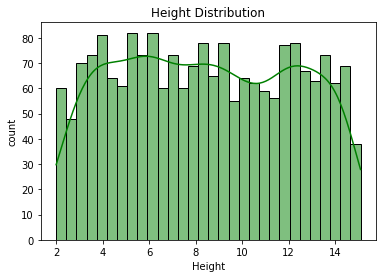

In [22]:
sns.histplot(data['stalk_height'].dropna(), kde=True, color='green', bins=30)

plt.xlabel('Height')
plt.ylabel('count')
plt.title('Height Distribution')
plt.show()

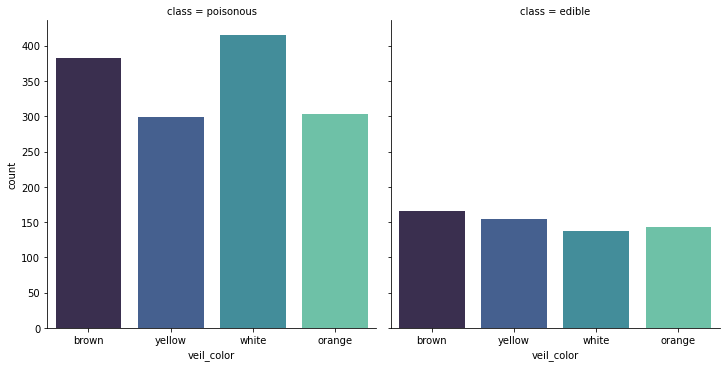

In [23]:
sns.catplot(x='veil_color', col='class', kind='count', data=data, palette='mako')

Maximum number of poisonous mushroom have veil_color as **white**. And very few number of edible mushrooms have white veil_color.

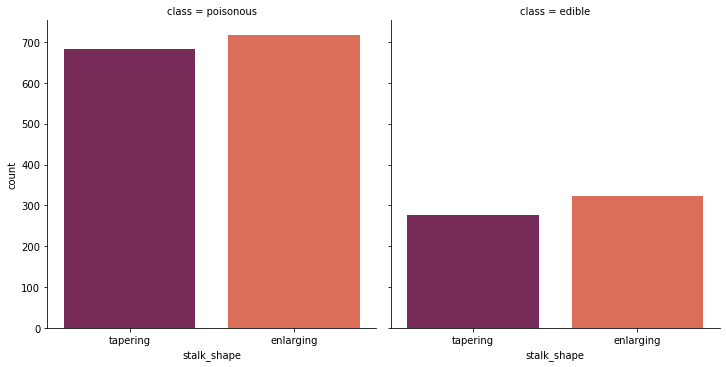

In [24]:
sns.catplot(x='stalk_shape', col='class', kind='count', data=data, palette='rocket')

Poisonous mushrooms mostly have an **enlarging stalk_shape.**

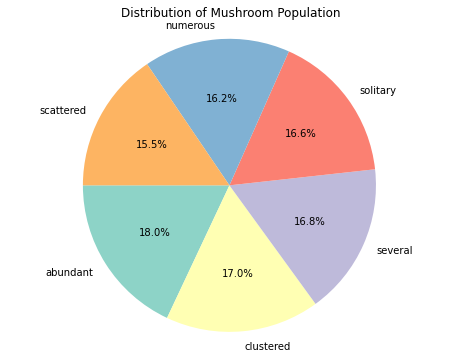

In [25]:
popl_counts = data['population'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(popl_counts, labels=popl_counts.index, autopct='%1.1f%%', startangle=180,
       colors=sns.color_palette('Set3'))
plt.title('Distribution of Mushroom Population')
plt.axis('equal') 
plt.show()

Here we can see that the data is approximately evenly distributed among all mushroom population type.

18% of the mushrooms are abundant in nature.

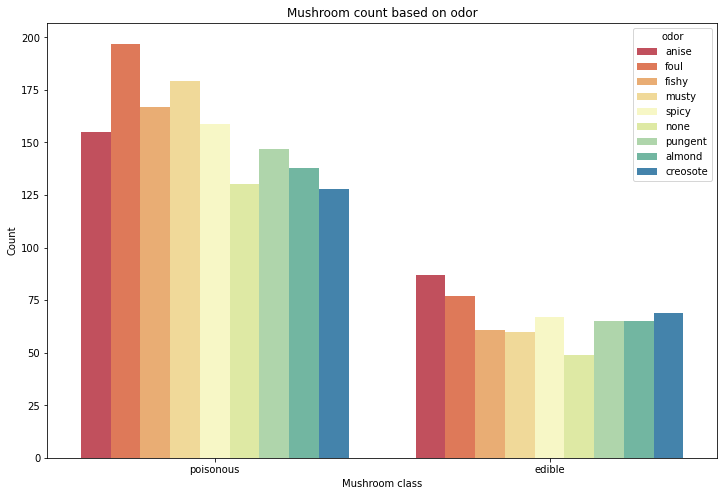

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='class', hue='odor', palette = 'Spectral')
plt.xlabel('Mushroom class')
plt.ylabel('Count')
plt.title('Mushroom count based on odor')
plt.show()

Maximum number of poisonous mushroom have **foul and musty odor.**

Most of edible mushrooms have **anise odor.**

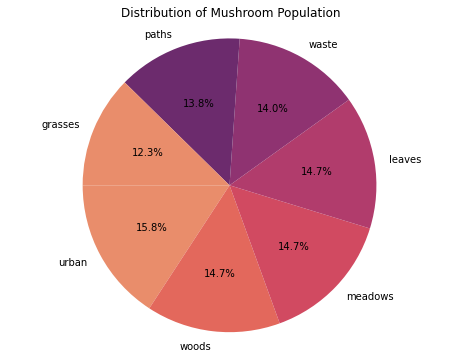

In [27]:
hab_counts = data['habitat'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(hab_counts, labels=hab_counts.index, autopct='%1.1f%%', startangle=180,
       colors=sns.color_palette('flare'))
plt.title('Distribution of Mushroom Population')
plt.axis('equal') 
plt.show()

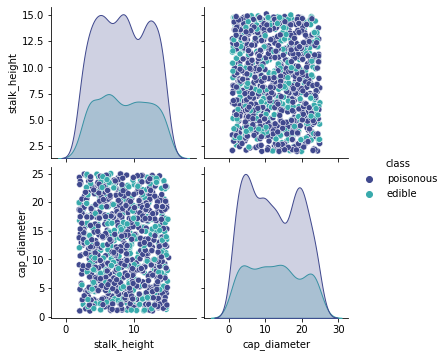

In [28]:
sns.pairplot(data = data, hue = 'class', palette = 'mako')

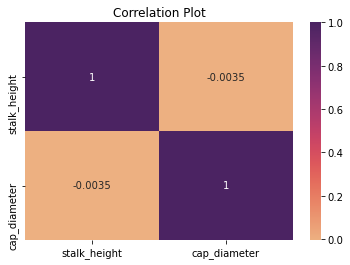

In [29]:
sns.heatmap(data.corr(), annot=True , cmap='flare')

plt.title('Correlation Plot')
plt.show()

**Encoding Categorical Features:**

In [30]:
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()

In [33]:
label_columns = [
    'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
    'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
    'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color','ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class'
]

In [34]:
for column in label_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

In [35]:
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


# Train-Test Splitting:

In [36]:
x = data.drop('class', axis = 1)
y = data['class']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# SVM:

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [40]:
svm_classifier = SVC(kernel='linear', random_state = 42)

In [41]:
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [42]:
y_pred = svm_classifier.predict(x_test)

In [43]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [44]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7025
Precision: 0.35125
Recall: 0.5
F1 Score: 0.41262848751835535

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.70      1.00      0.83       281

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



# Conclusion:

The **accuracy** of the SVM model is **70%.** 

Which means that 70% of the times the model will correctly classify the mushrooms as edible or poisonous.

The **precision** is quite low i.e. **35%**, indicating that only 35% of the positive predictions are correct.

**Visualize classification results on the testing data:**

In [45]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

CONFUSION MATRIX:

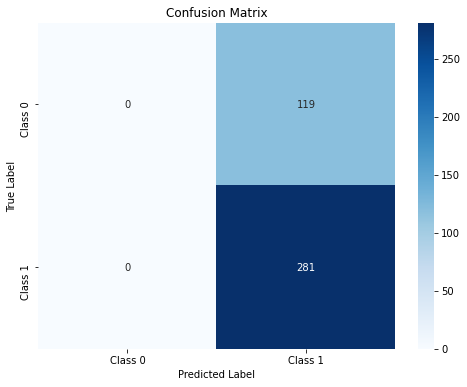

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC and AUC curve:

In [47]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

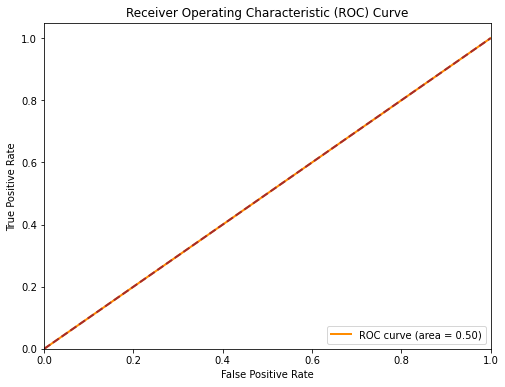

In [48]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='brown', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

An AUC of 0.5 means that the classifier has no discriminatory power.

**Thus, the current model does not effectively distinguish between the positive and negative classes.**

**Parameter Tuning and Optimization: BEST MODEL**

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
param_dist = {
    'C': [0.1, 1, 10, 100],            
    'gamma': [1, 0.1, 0.01, 0.001],  
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  
}

In [53]:
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

In [55]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [59]:
print("Best parameters found:\n", random_search.best_params_)
print("\nBest cross-validation accuracy: {:.4f}".format(random_search.best_score_))

Best parameters found:
 {'kernel': 'rbf', 'gamma': 1, 'C': 1}

Best cross-validation accuracy: 0.8512


Best SVM model:

In [60]:
best_svm_clf = random_search.best_estimator_

In [62]:
best_svm_clf.fit(x_train, y_train)

SVC(C=1, gamma=1, random_state=42)

In [64]:
y_pred_best = best_svm_clf.predict(x_test)

In [65]:
# Evaluate the best model's performance
accuracy_b = accuracy_score(y_test, y_pred_best)
precision_b = precision_score(y_test, y_pred_best, average='macro')
recall_b = recall_score(y_test, y_pred_best, average='macro')
f1_b = f1_score(y_test, y_pred_best, average='macro')

In [70]:
print('Evaluation results for best model:')
print(f'Accuracy: {accuracy_b}')
print(f'Precision: {precision_b}')
print(f'Recall: {recall_b}')
print(f'F1 Score: {f1_b}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_best))

Evaluation results for best model:
Accuracy: 0.8925
Precision: 0.933641975308642
Recall: 0.819327731092437
F1 Score: 0.854206399660945

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78       119
           1       0.87      1.00      0.93       281

    accuracy                           0.89       400
   macro avg       0.93      0.82      0.85       400
weighted avg       0.91      0.89      0.88       400



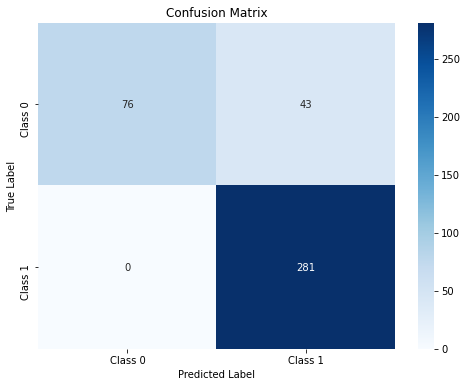

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [68]:
fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

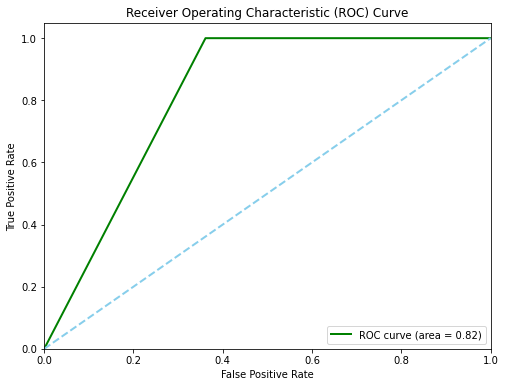

In [75]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Conclusion:

The **accuracy** for best model is 0.8925. Which means that the model correctly predicts 89.25% of the test instances.

According to the **precision score**, of the instances predicted as positive, 93.36% are actually positive. This is quite high and indicates few false positives.

The **AUC score of 0.82** supports the conclusion that the model has good discriminative ability between classes.

**Thus, we can conclude that the SVM model with the optimized hyperparameters shows strong performance, particularly in identifying positive instances accurately.**

**Comparing SVM results with various kernels:**

In [79]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [80]:
# Define a function to train and evaluate SVM with different kernels
def evaluate_svm_kernel(kernel_type, x_train, x_test, y_train, y_test):
    svm_clf = SVC(kernel=kernel_type, probability=True, random_state=42)
    svm_clf.fit(x_train, y_train)
    y_pred = svm_clf.predict(x_test)
    y_pred_prob = svm_clf.predict_proba(x_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    print(f"Kernel: {kernel_type}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("-" * 60)

In [81]:
# Evaluate SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    evaluate_svm_kernel(kernel, x_train, x_test, y_train, y_test)

Kernel: linear
Accuracy: 0.7025
Precision: 0.7025
Recall: 1.0000
F1 Score: 0.8253
AUC: 0.5130
------------------------------------------------------------
Kernel: poly
Accuracy: 0.7050
Precision: 0.7084
Recall: 0.9858
F1 Score: 0.8244
AUC: 0.6638
------------------------------------------------------------
Kernel: rbf
Accuracy: 0.7025
Precision: 0.7025
Recall: 1.0000
F1 Score: 0.8253
AUC: 0.7274
------------------------------------------------------------


**Discuss practical implications of SVM in real-world classification tasks.**

1) SVMs perform well even with a high number of features, making them suitable for tasks involving complex data such as image classification or text categorization.

2) SVMs support various kernel functions (linear, polynomial, radial basis function) that can capture different types of relationships in the data, enhancing their applicability across different domains.

3) SVMs are less prone to overfitting, especially in high-dimensional spaces, due to the margin maximization principle that focuses on finding the optimal decision boundary.

4) SVMs use a subset of training points (support vectors) to define the decision boundary, making them memory efficient, particularly with large datasets.